<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/AssignmentNN_ForestFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [ ]:
data=pd.read_csv("forestfires.csv")

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
data=data.drop(data.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data.info

<bound method DataFrame.info of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3          

In [ ]:
data.corr()

<ipython-input-62-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


Finding Outliers:


In [ ]:
outlier_data=data.copy()

<Axes: xlabel='area'>

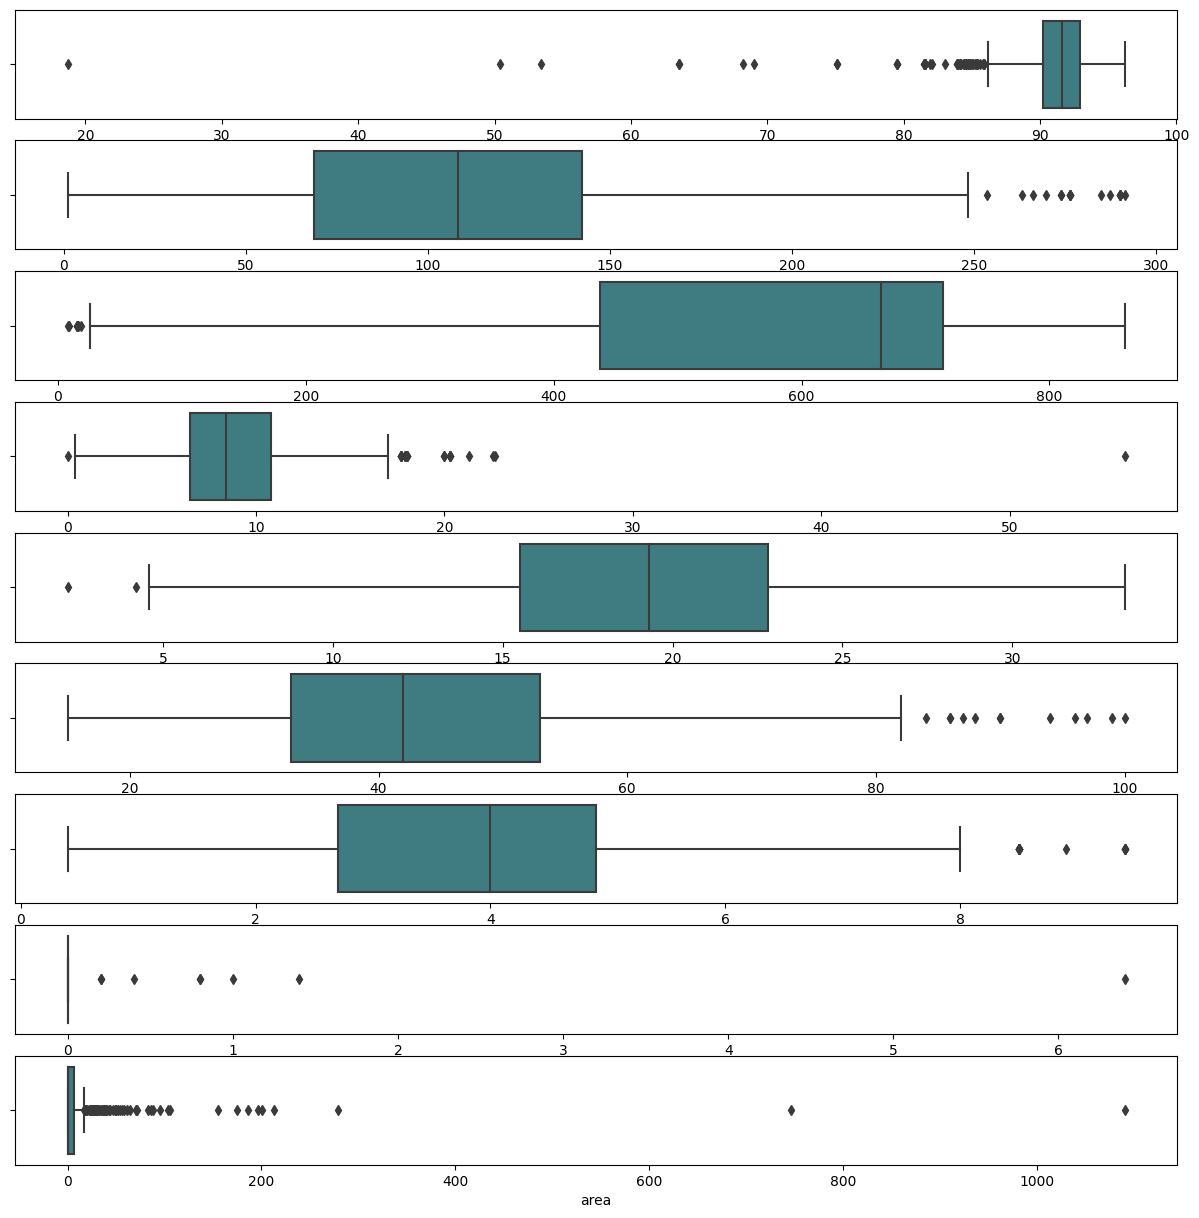

In [ ]:
fig,axes=plt.subplots(9,1,figsize=(15,15))
sns.boxplot(x='FFMC',data=outlier_data,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier_data,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier_data,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier_data,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier_data,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier_data,palette='crest',ax=axes[5])
sns.boxplot(x='wind',data=outlier_data,palette='crest',ax=axes[6])
sns.boxplot(x='rain',data=outlier_data,palette='crest',ax=axes[7])
sns.boxplot(x='area',data=outlier_data,palette='crest',ax=axes[8])

There are a number of outliers but we can drop drop the columns as they are in very large quantity.

Analyzing the damaned area

In [ ]:
data_area=data.copy()
def area_under_fire(area):
  if area==0.0:
    return "No Damage"
  elif area<=1:
    return "Low Damage"
  elif area<=25:
    return "Moderate Damage"
  elif area<=100:
    return " High Damage"
  else:
    return "Very High"

data_area["Damage"]=data_area["area"].apply(area_under_fire)
data_area.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Damage
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No Damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No Damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No Damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No Damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No Damage


Plotting the Damage for each month

Text(0.5, 1.0, 'Damage each Month')

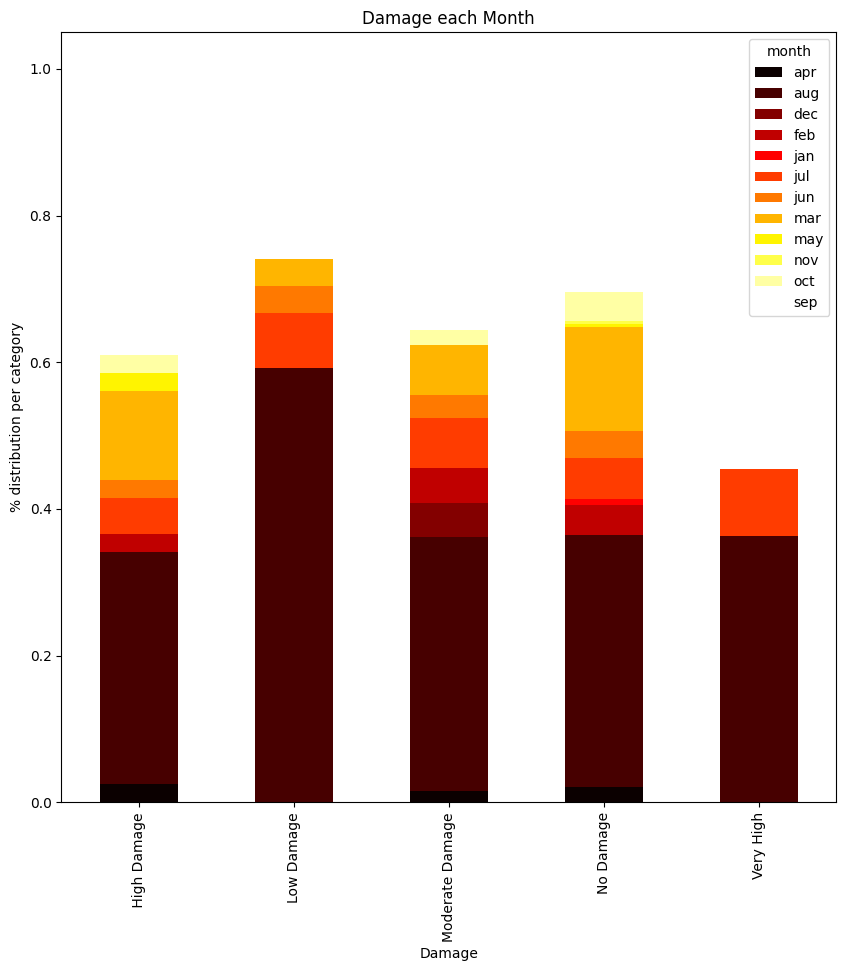

In [ ]:
  cross=pd.crosstab(index=data_area["Damage"],columns=data_area["month"],normalize="index")
  cross.plot.bar(stacked=True,cmap="hot",figsize=(10,10))
  plt.ylabel('% distribution per category')
  plt.title("Damage each Month")

From the plot we can understand that most of the damage was done in the month of August.



Plotting he burnt area

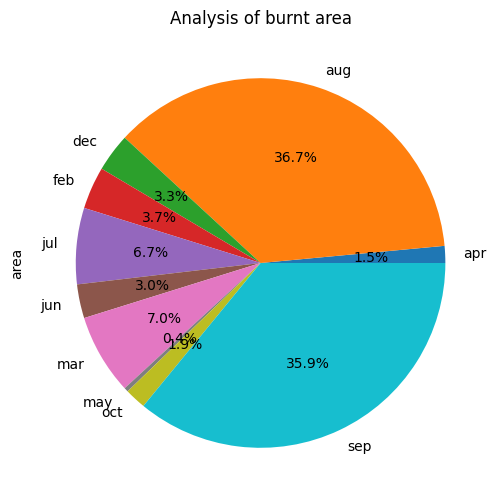

In [ ]:
areaburnt=data[data["area"]>0]
areaburnt.groupby("month")["area"].agg("count").plot(kind="pie",title="Analysis of burnt area",figsize=(6,6),autopct='%0.1f%%')
plt.show()

from the plot we can see that the month of August and September have highest forest fire of 36.7% and 35.9% respectively

Pre Processing

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


Converting non numerical data to numerical data


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data["month"]=Encoder.fit_transform(data["month"])
data["day"]=Encoder.fit_transform(data["day"])
data["size_category"]=Encoder.fit_transform(data["size_category"])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
data["month"]=Scaler.fit_transform(data[["month"]])
data["day"]=Scaler.fit_transform(data[["day"]])
data["FFMC"]=Scaler.fit_transform(data[["FFMC"]])
data["DMC"]=Scaler.fit_transform(data[["DMC"]])
data["DC"]=Scaler.fit_transform(data[["DC"]])
data["ISI"]=Scaler.fit_transform(data[["ISI"]])
data["temp"]=Scaler.fit_transform(data[["temp"]])
data["RH"]=Scaler.fit_transform(data[["RH"]])
data["wind"]=Scaler.fit_transform(data[["wind"]])
data["rain"]=Scaler.fit_transform(data[["rain"]])
data["area"]=Scaler.fit_transform(data[["area"]])
#data["size_category"]=Scaler.fit_transform(data[["size_category"]])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1


In [ ]:
x=data.iloc[:,:11]
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


In [ ]:
y=data[["size_category"]]
y.head()

,size_category
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

Hyperparameter Tuning
1.Optimal Batch_size
2.Number of Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(64,input_dim=11,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation="relu"))
  model.add(Dense(units=1,activation="sigmoid"))

  adam = Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
  return model

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
model = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,150]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator= model, param_grid= param_grid, cv= KFold(), verbose= 10)

In [ ]:
grid_result = grid.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{}, {} with {}".format(mean,stdev,param))

Best 0.8742857142857143, using {'batch_size': 10, 'epochs': 100}
0.8452380952380952, 0.07299861769883756 with {'batch_size': 10, 'epochs': 10}
0.8452380952380952, 0.0789672569132238 with {'batch_size': 10, 'epochs': 50}
0.8742857142857143, 0.051251901131709354 with {'batch_size': 10, 'epochs': 100}
0.8357142857142857, 0.07982406959162004 with {'batch_size': 10, 'epochs': 150}
0.7980952380952381, 0.035328070459031254 with {'batch_size': 20, 'epochs': 10}
0.8071428571428572, 0.04542567625794978 with {'batch_size': 20, 'epochs': 50}
0.8652380952380951, 0.0634531626861521 with {'batch_size': 20, 'epochs': 100}
0.8547619047619047, 0.056544486128751986 with {'batch_size': 20, 'epochs': 150}
0.8071428571428572, 0.06917066212539975 with {'batch_size': 40, 'epochs': 10}
0.8742857142857142, 0.051251901131709354 with {'batch_size': 40, 'epochs': 50}
0.8547619047619047, 0.07079080355865953 with {'batch_size': 40, 'epochs': 100}
0.8261904761904763, 0.08505033856900832 with {'batch_size': 40, 'epoch

Hyperparameter Tuning:
1.Optimal Droupout Rate

In [ ]:
def create_model(dropout_rate):
  model2=Sequential()
  model2.add(Dense(64,input_dim=11,activation="relu"))
  model2.add(Dense(64,activation='relu'))
  model2.add(Dense(32,activation="relu"))
  model2.add(Dense(units=1,activation="sigmoid"))

  adam=Adam(lr=0.01)
  model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
  return model2


In [ ]:
model2=KerasClassifier(build_fn=create_model,dropout_rate=0.0,batch_size=10,epochs=10,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.7966666666666666, using {'dropout_rate': 0.0}
0.7966666666666666,0.09725950046570772 with {'dropout_rate': 0.0}
0.7871428571428571,0.09311441770521092 with {'dropout_rate': 0.1}
0.7780952380952382,0.06065403172605965 with {'dropout_rate': 0.2}
0.7966666666666666,0.09725950046570772 with {'dropout_rate': 0.3}
0.7876190476190477,0.06812020854189586 with {'dropout_rate': 0.4}
0.7771428571428572,0.10868832470618747 with {'dropout_rate': 0.5}


Hyper Parameter Tuning:
1.Optimal Activation function and Kernel Initializer

In [ ]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=11,kernel_initializer = init,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,kernel_initializer = init,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,kernel_initializer = init,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))

    adam = Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy', optimizer = adam, metrics=["accuracy"])
    return model3

In [ ]:
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
model3 = KerasClassifier(build_fn=create_model,activation_function=activation_function,batch_size=10,epochs=100,verbose=0,init=init)
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

In [ ]:
grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean, stdev, param))

Best 0.8738095238095239, using {'activation_function': 'tanh', 'init': 'uniform'}
0.8738095238095237,0.06884205854667123 with {'activation_function': 'softmax', 'init': 'normal'}
0.8642857142857142,0.07361726111304906 with {'activation_function': 'softmax', 'init': 'uniform'}
0.758095238095238,0.1054694719992924 with {'activation_function': 'softmax', 'init': 'zero'}
0.8547619047619047,0.07079080355865953 with {'activation_function': 'tanh', 'init': 'normal'}
0.8738095238095239,0.08095238095238093 with {'activation_function': 'tanh', 'init': 'uniform'}
0.758095238095238,0.1054694719992924 with {'activation_function': 'tanh', 'init': 'zero'}
0.8642857142857142,0.0671749332365042 with {'activation_function': 'relu', 'init': 'normal'}
0.8738095238095239,0.08095238095238093 with {'activation_function': 'relu', 'init': 'uniform'}
0.758095238095238,0.1054694719992924 with {'activation_function': 'relu', 'init': 'zero'}


Building Neural Network using optimal values

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]

    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='uniform', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8644067645072937
batch_size: 5 - epochs: 10 Accuracy: 0.9418886303901672
batch_size: 5 - epochs: 50 Accuracy: 0.9782082438468933
batch_size: 5 - epochs: 100 Accuracy: 0.9830508232116699
batch_size: 10 - epochs: 5 Accuracy: 0.7796609997749329
batch_size: 10 - epochs: 10 Accuracy: 0.8861985206604004
batch_size: 10 - epochs: 50 Accuracy: 0.9854721426963806
batch_size: 10 - epochs: 100 Accuracy: 0.9854721426963806
batch_size: 15 - epochs: 5 Accuracy: 0.7602905631065369
batch_size: 15 - epochs: 10 Accuracy: 0.8644067645072937
batch_size: 15 - epochs: 50 Accuracy: 0.990314781665802
batch_size: 15 - epochs: 100 Accuracy: 0.9878934621810913
batch_size: 20 - epochs: 5 Accuracy: 0.7578692436218262
batch_size: 20 - epochs: 10 Accuracy: 0.8111380338668823
batch_size: 20 - epochs: 50 Accuracy: 0.9854721426963806
batch_size: 20 - epochs: 100 Accuracy: 0.9927361011505127


In [ ]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='uniform', activation='tanh'))

# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
28/28 [==============================] - 1s 14ms/step - loss: 0.6884 - accuracy: 0.7355 - val_loss: 0.6838 - val_accuracy: 0.7153
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.7572 - val_loss: 0.6634 - val_accuracy: 0.7372
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.7609 - val_loss: 0.6201 - val_accuracy: 0.7445
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5825 - accuracy: 0.7717 - val_loss: 0.5726 - val_accuracy: 0.7445
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7645 - val_loss: 0.5396 - val_accuracy: 0.7518
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.5071 - accuracy: 0.7681 - val_loss: 0.5266 - val_accuracy: 0.7664
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7790 - val_loss: 0.5056 - val_accuracy: 0.7664
Epoch 8/100


In [ ]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9903
accuracy: 99.03%


Predicting the values

In [ ]:
# generating predictions for test data
y_predict_test = model.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 3ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
16,1,0.998749,1
218,0,0.001599,0
418,1,0.996358,1
102,1,0.998782,1
441,1,0.998291,1
164,1,0.995547,1
415,0,0.001599,0
204,0,0.001631,0
356,1,0.998210,1
298,1,0.998761,1


In [ ]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 3ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
487,0,0.001613,0
118,1,0.998764,1
189,0,0.006818,0
190,0,0.027428,0
376,1,0.998602,1
459,1,0.997144,1
239,1,0.998672,1
112,1,0.998591,1
325,1,0.998661,1
443,1,0.998668,1


In [ ]:
# print the scores on training and test set
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))
print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))


13/13 [==============================] - 0s 2ms/step
Training set score : 99.27%
Test set score     : 98.08%
